In [2]:
import pandas as pd
import pyarrow.parquet as pq

# Read the Parquet file metadata
parquet_file = pq.ParquetFile('nougat.parquet')

# Print the Parquet file schema
print("Parquet File Schema:")
print(parquet_file.schema)

# Print the number of row groups
print(f"\nNumber of row groups: {parquet_file.num_row_groups}")

# Print metadata for each column
print("\nColumn Metadata:")
for col in parquet_file.schema:
    print(f"Column: {col.name}")
    print(f"  Type: {col.physical_type}")
    # Remove the line that was causing the AttributeError

    print()

# Read the first few rows to see the data structure
df = pd.read_parquet('nougat.parquet', engine='pyarrow')
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
df.info()


Parquet File Schema:
required group field_id=-1 schema {
  optional binary field_id=-1 filename (String);
  optional binary field_id=-1 text (String);
}


Number of row groups: 1

Column Metadata:
Column: filename
  Type: BYTE_ARRAY

Column: text
  Type: BYTE_ARRAY


First few rows of the DataFrame:
                            filename  \
0  10.1016@S0031-9422(97)00824-8.pdf   
1            10.1021@np50032a021.pdf   
2  10.1016@S0031-9422(00)84396-4.pdf   
3   10.1016@0031-9422(74)80252-9.pdf   
4  10.1016@S0031-9422(00)83467-6.pdf   

                                                text  
0  # 10.1016@S0031-9422(97)00824-8.pdf\n\n## Page...  
1  # 10.1021@np50032a021.pdf\n\n## Page 1\n\n\n\n...  
2  # 10.1016@S0031-9422(00)84396-4.pdf\n\n## Page...  
3  # 10.1016@0031-9422(74)80252-9.pdf\n\n## Page ...  
4  # 10.1016@S0031-9422(00)83467-6.pdf\n\n## Page...  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 2 columns):
 #   Co

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  392 non-null    object
 1   text      392 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB

First few rows of the DataFrame:
                            filename  \
0  10.1016@S0031-9422(97)00824-8.pdf   
1            10.1021@np50032a021.pdf   
2  10.1016@S0031-9422(00)84396-4.pdf   
3   10.1016@0031-9422(74)80252-9.pdf   
4  10.1016@S0031-9422(00)83467-6.pdf   

                                                text  
0  # 10.1016@S0031-9422(97)00824-8.pdf\n\n## Page...  
1  # 10.1021@np50032a021.pdf\n\n## Page 1\n\n\n\n...  
2  # 10.1016@S0031-9422(00)84396-4.pdf\n\n## Page...  
3  # 10.1016@0031-9422(74)80252-9.pdf\n\n## Page ...  
4  # 10.1016@S0031-9422(00)83467-6.pdf\n\n## Page...  

Summary of text lengths:
count      392.000000
mean     15952.147959
std       961

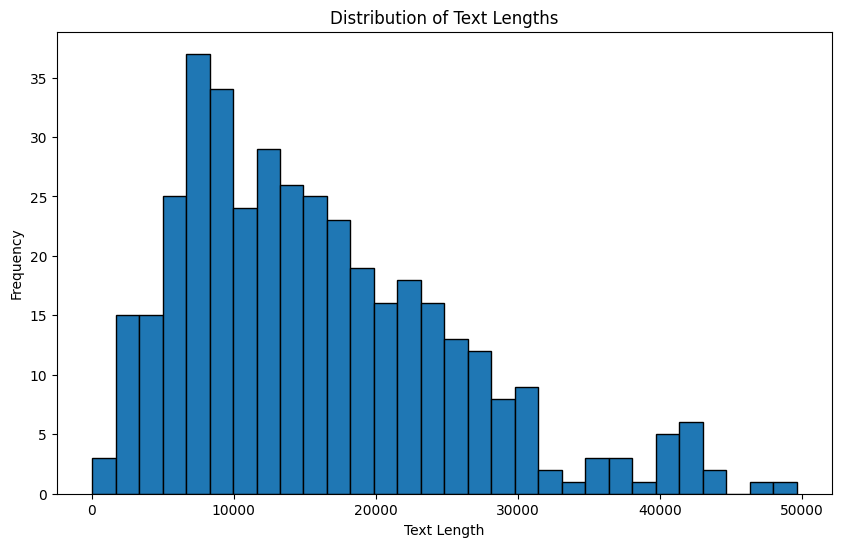


Top 20% of entries with the longest text:
10.1021@jf801103p.pdf: 49619 characters
10.1016@j.tiv.2008.01.003.pdf: 47135 characters
10.1002@elps.201000658.pdf: 44516 characters
10.1016@j.bse.2012.03.005.pdf: 43345 characters
10.1016@j.biortech.2010.01.041.pdf: 42956 characters
10.2174@187152010794728620.pdf: 42892 characters
10.1016@j.phytochem.2010.05.012.pdf: 42158 characters
10.1002@ps.1278.pdf: 42089 characters
10.3390@molecules190812031.pdf: 41566 characters
10.1016@j.jfca.2003.09.013.pdf: 41400 characters
10.1590@S0103-50532004000300008.pdf: 40995 characters
10.1002@pca.1208.pdf: 40976 characters
10.1055@s-0034-1368301.pdf: 40168 characters
10.1016@j.phytochem.2013.09.022.pdf: 39880 characters
10.1515@znc-2008-5-611.pdf: 39704 characters
10.1155@2013@835081.pdf: 38148 characters
10.1002@jobm.200800093.pdf: 37688 characters
10.1016@j.cbi.2010.08.008.pdf: 37450 characters
10.1016@S0031-9422(00)89891-X.pdf: 36442 characters
10.1021@np400717m.pdf: 36039 characters
10.1093@chromsci@bms

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the parquet file
df = pd.read_parquet('nougat.parquet')

# Display basic information about the DataFrame
print("DataFrame Info:")
df.info()

# Show the first few rows
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Display summary of text lengths
text_length = df['text'].str.len()
print("\nSummary of text lengths:")
print(text_length.describe())

# Check for empty text fields
empty_texts = df[df['text'].str.strip() == '']
print(f"\nNumber of empty text fields: {len(empty_texts)}")

if not empty_texts.empty:
    print("\nFilenames with empty text fields:")
    print(empty_texts['filename'].tolist())

# Visualize text length distribution
plt.figure(figsize=(10, 6))
plt.hist(text_length, bins=30, edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Output names of entries with the longest text values (top 20%)
# Calculate text lengths
df['text_length'] = df['text'].str.len()

# Sort by text length and get top 20%
top_20_percent = df.sort_values('text_length', ascending=False).head(int(len(df) * 0.2))

print("\nTop 20% of entries with the longest text:")
for _, row in top_20_percent.iterrows():
    print(f"{row['filename']}: {row['text_length']} characters")

# Check for potential encoding issues
print("\nChecking for potential encoding issues:")
for _, row in df.iterrows():
    if not row['text'].isascii():
        print(f"Filename: {row['filename']} might have non-ASCII characters")

# Display unique filenames to check for duplicates
print("\nNumber of unique filenames:", df['filename'].nunique())
if df['filename'].nunique() < len(df):
    print("Duplicate filenames found:")
    print(df['filename'].value_counts()[df['filename'].value_counts() > 1])

# Count and display the number of empty text fields
empty_text_count = df['text'].str.strip().eq('').sum()
print(f"\nNumber of files with empty text: {empty_text_count}")


In [3]:
# Find the longest entry
longest_entry = df.loc[df['text_length'].idxmax()]

print(f"\nFull text of the longest entry (Filename: {longest_entry['filename']}):")
print("=" * 80)
print(longest_entry['text'])
print("=" * 80)
print(f"\nLength: {longest_entry['text_length']} characters")



Full text of the longest entry (Filename: 10.1016@S0031-9422(00)89891-X.pdf):
Phytochemistry. 1971, Vol. 10, pp. 2433 to 2450. Pergamon Press. Printed in England. THE FLAVONES OF APULEIA LEIOCARPA*t R. B RAZ FILHO: and 0. R. G~TTLIEB~ Laborat6rio da Produtos Naturais de Funda@o de Amparo A Pesquisa do Estado de SLo Paulo, Universidade de Sgo Paulo, Brasil (Received 9 July 1970) Abstract-The wood of Apuleiu leiocurpu (Vog.) Macbr. (Leguminosae, subfamily Caesalpinioideae) yielded (+)-pinitol, &sitosterol and ten flavones. Three of these flavones are the known compounds ayanin (X), oxyayanin-A (VIIIa) and oxyayanin-B (IX). The constitutions of the seven new flavones, apulein (Ia), 5-O-demethylapulein (Ib), apuleisin (Va), apuleitrin (Via), apuleirin (Vie), apuleidin (VIIa) and 5-O-methyl- oxyayanin-A (VIIIb) were established. A structural proposal is also advanced for leiocarpin (XVI), a new pterocarpan isolated from the bark. The unusual oxygenation pattern of the flavones is discussed

In [6]:
#give me the text of the pdf 10.1016@0031-9422(90)80024-B.pdf
# Extract and display the text of the PDF with filename '10.1016@0031-9422(90)80024-B.pdf'
pdf_filename = '10.1016@0031-9422(90)80024-B.pdf'
pdf_text = df.loc[df['filename'] == pdf_filename, 'text'].values

if pdf_text:
    print(f"\nText of the PDF {pdf_filename}:")
    print("=" * 80)
    for line in pdf_text[0].split('\n'):
        print(line)
    print("=" * 80)
else:
    print(f"\nNo text found for the PDF {pdf_filename}.")



Text of the PDF 10.1016@0031-9422(90)80024-B.pdf:
Phytochemistry, Vol. 29, No. 3, pp. 813--815, 1990. 003 l-9422/90 $3.00 + 0.00 Printed in Great Britain. Pergamon Press plc MObLUSCICIDAL QUINOLINE ALKALOIDS FROM GALIPEA BRACTEATA PAULO C. VIEIRA* and ISAO KUBO Division of Entomology and Parasitology, College of Natural Resources, University of California, Berkeley, CA 94720, U.S.A. (Received in revised form 12 August 1989) Key Word Index--G&pea bracteata; Rutaceae; stems; quinoline alkaloids; plant growth inhibitor; molluscicidal activity. Abstract-Four quinoline alkaloids were isolated from stems of Gnlipea bracteata. In addition to one new compound, 2-(3’,4’-methylenedioxyphenylethyl)-quinoline, three were identified as the known compounds 2+propylquinoline, 2- n-pentylquinoline and 2-(l’-pentenyl)-quinoline. However, this is the first report of their isolation from a natural source. All alkaloids showed an inhibitory effect on shoot and root growth of lettuce (Lactuca satiua). Thr